In [2]:
# Importando bibliotecas utilizadas no projeto
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
dataset = 'Tomato pest image enhancement'
height, width = 299, 299
batch_size = 32
SEED = 123
training = keras.utils.image_dataset_from_directory(
    dataset,
    labels='inferred',
    validation_split=.2,
    image_size=(height, width),
    class_names = None,
    subset='training',
    seed=SEED,
    label_mode='categorical'
)

Found 4263 files belonging to 8 classes.
Using 3411 files for training.


In [4]:
validation = keras.utils.image_dataset_from_directory(
    dataset,
    labels='inferred',
    validation_split=.2,
    image_size=(height, width),
    class_names = None,
    subset='validation',
    seed=SEED,
    label_mode='categorical'
)

Found 4263 files belonging to 8 classes.
Using 852 files for validation.


In [5]:
class_names = training.class_names

In [6]:
base_model = keras.applications.ResNet50(
    include_top=False,
    input_shape = (height, width, 3),
    pooling='avg',
    classes=8,
    weights='imagenet'
)
for layer in base_model.layers:
    layer.trainable = False

In [7]:
model = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(8, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 24,640,904
Trainable params: 1,053,192
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(training, validation_data=validation, epochs=10)

Epoch 1/10
107/107 [==============================] - 33s 235ms/step - loss: 0.6949 - accuracy: 0.7649 - val_loss: 0.3100 - val_accuracy: 0.8885
Epoch 2/10
107/107 [==============================] - 23s 217ms/step - loss: 0.1669 - accuracy: 0.9507 - val_loss: 0.2547 - val_accuracy: 0.9026
Epoch 3/10
107/107 [==============================] - 24s 219ms/step - loss: 0.0808 - accuracy: 0.9798 - val_loss: 0.1439 - val_accuracy: 0.9589
Epoch 4/10
107/107 [==============================] - 24s 221ms/step - loss: 0.0393 - accuracy: 0.9921 - val_loss: 0.1260 - val_accuracy: 0.9683
Epoch 5/10
107/107 [==============================] - 24s 224ms/step - loss: 0.0224 - accuracy: 0.9959 - val_loss: 0.1099 - val_accuracy: 0.9624
Epoch 6/10
107/107 [==============================] - 23s 217ms/step - loss: 0.0111 - accuracy: 0.9982 - val_loss: 0.1030 - val_accuracy: 0.9730
Epoch 7/10
107/107 [==============================] - 22s 204ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.0941 - val_ac

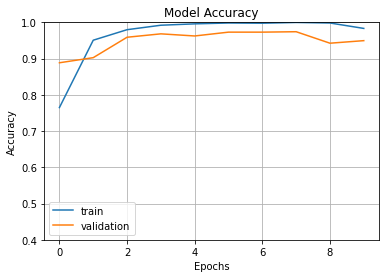

In [10]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1) 
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [14]:
classes = validation.class_names
classes

['BA', 'HA', 'MP', 'SE', 'SL', 'TP', 'TU', 'ZC']

In [12]:
import cv2
image=cv2.imread(f'{dataset}/BA/BA (1).jpg')
image=np.expand_dims(image,axis=0)  

In [13]:
prediction = model.predict(image)
validation.class_names[np.argmax(prediction)]

'BA'

In [48]:
img = keras.preprocessing.image.load_img(f'{dataset}/BA/BA (1).jpg', target_size=(height, width,3))
keras.preprocessing.image.img_to_array(img).shape

(299, 299, 3)

In [20]:
# Extraindo arquivos utilizados para validação em cada classe
files = validation.file_paths
files_per_class = {}
for classe in classes:
    files_per_class[classe] = [file for file in files if classe in file]
files_per_class.keys()

dict_keys(['BA', 'HA', 'MP', 'SE', 'SL', 'TP', 'TU', 'ZC'])

In [51]:
for path in files_per_class['BA']:    
    image = cv2.imread(path)
    image = np.expand_dims(image, axis=0)
    print(type(path))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [54]:
results = {
    'BA': [],
    'HA': [],
    'MP': [],
    'SE': [],
    'SL': [],
    'TP': [],
    'TU': [],
    'ZC': []
}
for classe, paths in files_per_class.items():
    for path in paths:
        image = cv2.imread(path)
        image = np.expand_dims(image, axis=0)
        prediction = model.predict(image)
        results[classe].append(prediction)
print(results['BA'])

[array([[9.9999988e-01, 2.8278230e-04, 7.3237978e-02, 9.7193199e-01,
        2.8454887e-03, 3.8589519e-02, 9.6246332e-01, 3.0137019e-04]],
      dtype=float32), array([[1.0000000e+00, 3.1751547e-02, 2.7584076e-01, 9.7523168e-02,
        1.1843602e-02, 4.3784127e-02, 3.1528804e-03, 9.0666115e-05]],
      dtype=float32), array([[9.9998868e-01, 3.7739184e-02, 8.4724307e-01, 5.7367009e-01,
        4.4117452e-04, 4.8599184e-01, 5.4480726e-01, 5.3632832e-03]],
      dtype=float32), array([[9.9999738e-01, 7.3362239e-02, 2.8290060e-01, 9.2656738e-01,
        4.4852979e-02, 5.7873138e-05, 1.4180236e-01, 3.2068521e-02]],
      dtype=float32), array([[9.9999964e-01, 2.7212715e-02, 8.8253361e-01, 8.2941115e-01,
        3.9508673e-03, 6.9907948e-02, 8.7725990e-02, 1.2773956e-04]],
      dtype=float32), array([[1.0000000e+00, 2.4058553e-04, 9.9899369e-01, 1.0719725e-01,
        2.5326441e-05, 1.0415365e-01, 2.8249082e-01, 4.5327266e-05]],
      dtype=float32), array([[9.99997735e-01, 3.88557702e-01,

In [127]:
y_true = []
for img, labels in validation:
    for true in labels:
        y_true.append(true)
y_true = np.array(y_true)
y_pred = model.predict(validation)

In [129]:
y_true[0]

array([0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [130]:
y_pred[0]

array([4.2242830e-04, 2.2103931e-01, 9.6185926e-05, 9.9869746e-01,
       1.0000000e+00, 3.5608134e-03, 1.1200934e-03, 1.1890319e-03],
      dtype=float32)

In [122]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.142018779342723